## Discovery and Learning with Big Data/Machine Learning
### DeAundrie Howard
### Machine Learning Supervised Logistic Regression

### Supervised Learning Workflow

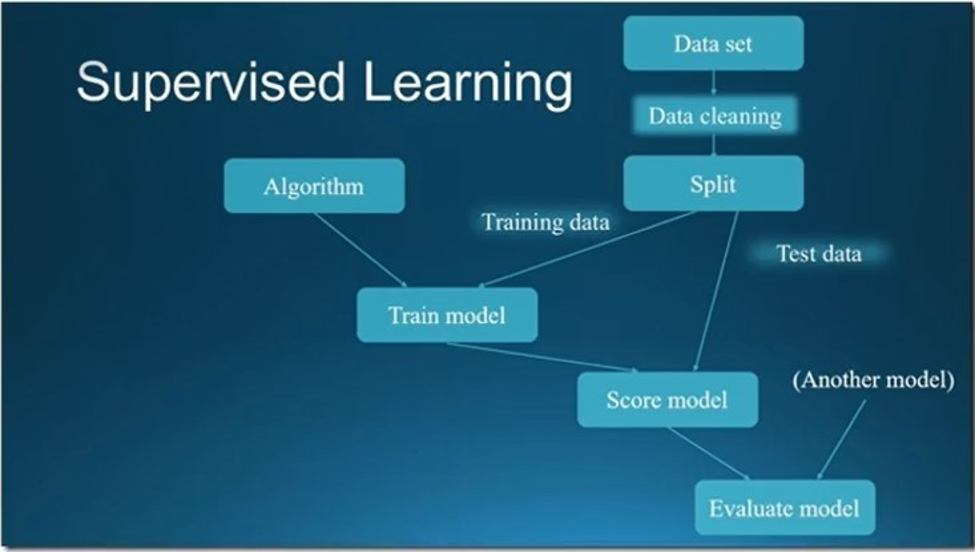
- You can see in this picture that supervised learning startw with the data set.  Remember since it is supervised, the data is labeled.  Then there is some data preprocessing (cleaning) to be done.  Next, you will declare your input (X/Indepentdent variables) and output (Target Variable/Dependent or Y) NumPy Arrays.  Then the data is split into a testing and training set.  Then you will build and train the model, use the model for predictions, and lastly, evaluate/validate the model.  So let's begin.

### Description Iris Dataset

Data Set: Iris.csv
Title: Iris Plants Database
Updated Sept 21 by C. Blake -Added discrepancy information 
Sources:
- Creator: RA_ Fisher 
- Donor: Michael Marshall 
- Date: 1988 

Relevant Information: This is perhaps the best-known database to be found in the pattern recognition literature. Fishers paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example)

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. 

Predicted attribute: class of iris plant

Number of Instances: 150 (50 in each of three classes)

Number of predictors: 4 numeric, predictive attributes and the class Attribute Information:
- 1.sepal length in cm 
- 2.sepal width in cm 
- 3.petal length in cm 
- 4.petal width incm 
- 5.class: 
    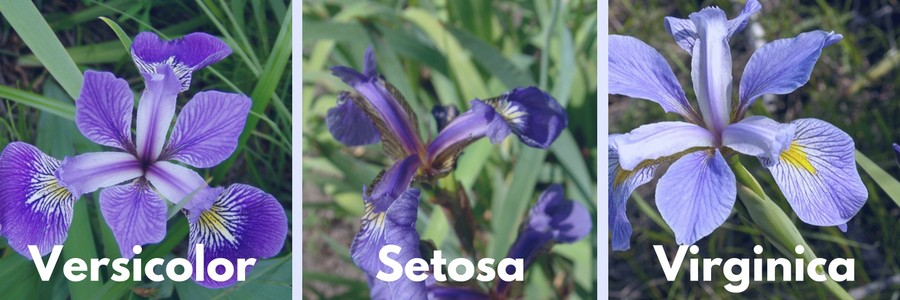


## <span style= 'color: red'>1. What is happening in the code blocks below? Enter your answer by adding a new code block and use markdown.</span>

In [1]:
# Import Python Libraries: NumPy and Pandas
import pandas as pd
import numpy as np

In [2]:
# Import Libraries & modules for data visualization
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import scikit-Learn module for the algorithm/modeL: Logistic Regression
from sklearn.linear_model import LogisticRegression

In [4]:
# Import scikit-Learn module to split the dataset into train/ test sub-datasets
from sklearn.model_selection import train_test_split

In [5]:
# Import scikit-Learn module for K-fold cross-validation - algorithm/modeL evaluation & validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [6]:
# Import scikit-Learn module classification report to later use for information about how the system 
#try to classify / lable each record
from sklearn.metrics import classification_report

The previous six (6) code blocks imports entire python libraries for data analysis, machine learning, and data visualization. 

##  <span style= 'color: red'>2. What is happening in the code block below question 3? Enter your answer by adding a new code block and use markdown.</span>

In code block three (3), we are importing 'iris.csv' file, and assigning it to a DataFrame.

##  <span style= 'color: red'>3. What would happen to the code if you enter '..iris.csv' instead of 'iris.csv'?  You should create a new code block and make the change to the code and then run the code.  This will create an error code.   Create a new code block and enter the error code in that 2nd created code block using markdown.  Don't forget to delete the code block were you entered '..iris.csv', the incorrect code.</span>

In [8]:
# Specify location of the dataset
filename = 'iris.csv'
# Load the data into a Pandas DataFrame
df = pd.read_csv(filename)

In [10]:
file_name = '..iris.csv'
iris_df = pd.read_csv(file_name)

FileNotFoundError: [Errno 2] No such file or directory: '..iris.csv'

The error above is a result of '..iris.csv' directory path referencing a directory rather a single file. 

##  <span style= 'color: red'>4. What does the df.head function do?  Enter your answer by adding a new code block and use markdown.</span>

The df.head() function will display the first five (5) records of the given DataFrame.

In [11]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


##  <span style= 'color: red'>5. What is different between the output of the df.head() in your linear regression homework and this logistic regression homework?  Enter your answer by adding a new code block and use markdown.</span>

df.head() within linear regression reflects the relationship between the independent and dependent variables, while logistic regression df.head() will reflect the relationship between the independent variable and the target variable.

## Preprocess the Dataset

##  <span style= 'color: red'>6. What is happening in the code block below?  Enter your answer by adding a new code block and use markdown.</span>

In [13]:
# mark zero values as missing or NaN
df[[ 'SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' ,'PetalWidthCm' ]] \
= df[['SepalLengthCm' , 'SepalWidthCm' ,'PetalLengthCm' , 'PetalWidthCm' ]].replace(0,np.NaN)
# count the number of NaN values in each column
print (df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In the code block above, we are (1) replacing all the zeroed values with null a null indicator (NaN), then we are printing the sum all of the null values within in the each column index.

## Performing the Exploratory Data Analysis (EDA)

##  <span style= 'color: red'>7. What is happening when df.shape is being called and how many rows and columns are in the dataset?  Enter your answer by adding a new code block and use markdown.</span>

In [14]:
print("Shape of the dataset(rows, columns):",df.shape)

Shape of the dataset(rows, columns): (150, 6)


When df.shape() is called, it shows the dimensions of a Dataframe - it shows the rows by columns of a DataFrame. For this dataset in particular, it has 150 rows and 6 columns.

##  <span style= 'color: red'>8. What is happening when df.dtypes is being called. Enter your answer by adding a new code block and use markdown.</span>

When df.dtypes is being called, it show the data types of each column index.

In [16]:
#get the data types of all the variables / attributes in the data set
print(df.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


##  <span style= 'color: red'>9. What is happening when df.describe is being called? Enter your answer by adding a new code block and use markdown.</span>

In [17]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


When df.describe() is called, it provides brief statistics of a given dataset.

##  <span style= 'color: red'>10. What is the mean of SepalWidthCM? Enter your answer by adding a new code block and use markdown.</span>

SepalWidthCm is the column index or name for the sepal width (in centimeters) of a each iris flower. 

##  <span style= 'color: red'>11. What is the mean of PetalWidthCM? Enter your answer by adding a new code block and use markdown.</span>

PepalWidthCm is the column index or name for the petal width (in centimeters) of a each iris flower.

##  <span style= 'color: red'>12. What is the count of PetalLengthCM? Enter your answer by adding a new code block and use markdown.</span>

PetalLegnthCm is the column index or name for the petal length (in centimeters) of a each iris flower.

In [19]:
#return the summary statistics of the numeric variables / attributes in the data set
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


##  <span style= 'color: red'>13. What does the df.groupby.size() function do?  Enter your answer by adding a new code block and use markdown.</span>

In [20]:
print(df.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


When the df.groupby.size() function is called, it will two things: (1) it will group the dataset by a specified category, (2) it will return the cumulative sum of each category. 

### Creating a Histogram

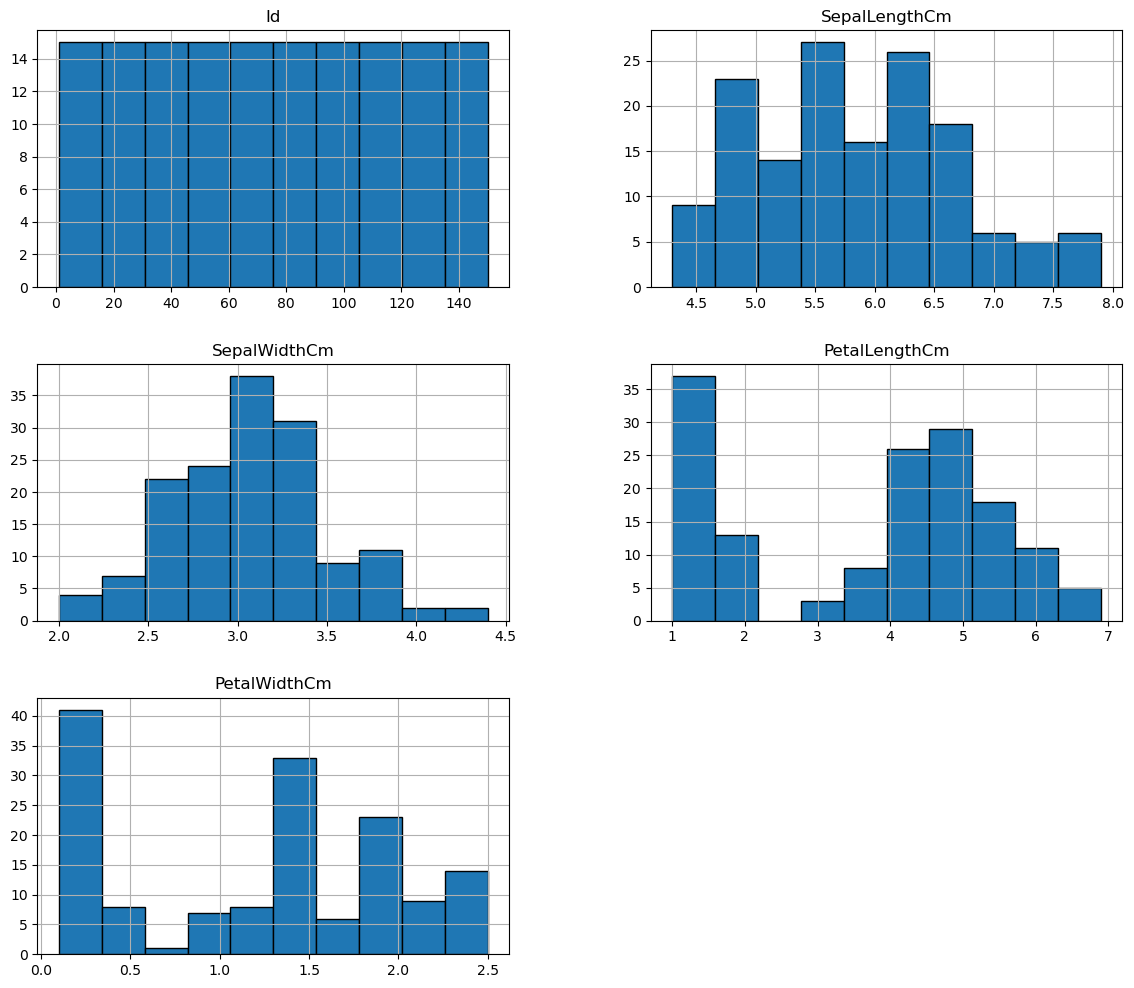

In [21]:
# Plot histogram for each variable. I encourage you to work with the histogram. Remember what you did in the previous homework.
df.hist(edgecolor= 'black',figsize=(14,12))
plt.show()

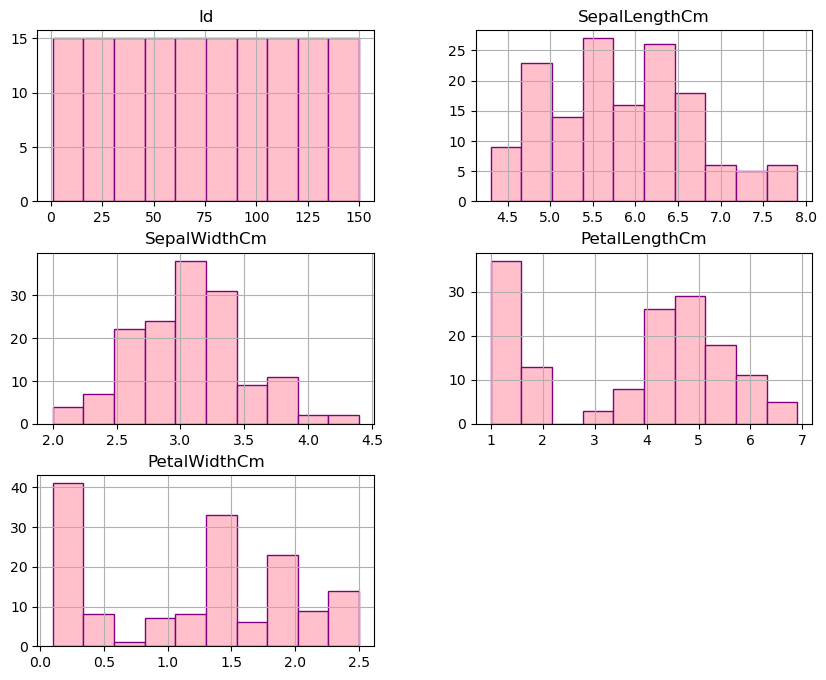

In [23]:
# Plot histogram for each variable. I encourage you to work with the histogram. Remember what you did in the previous homework.
df.hist(color = "pink", edgecolor= 'purple',figsize=(10,8))
plt.show()

### Creating a Box Plot

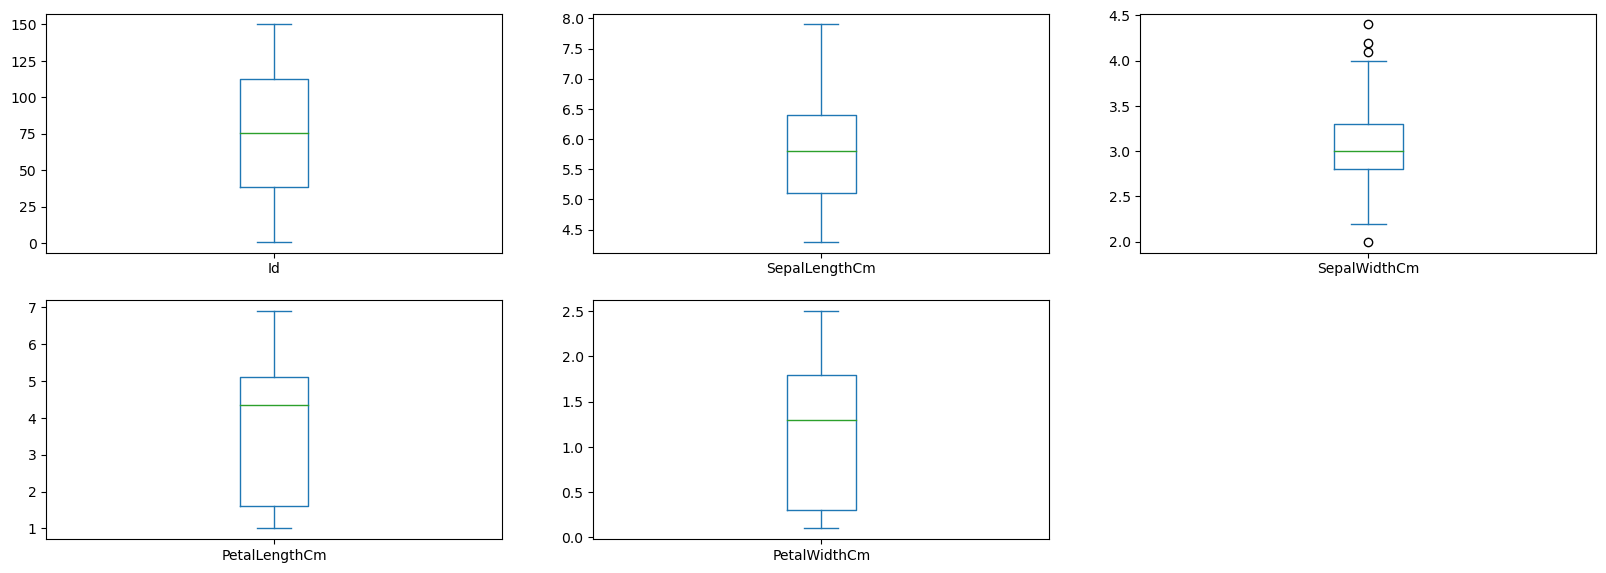

In [24]:
# Boxplots
df.plot(kind="box", subplots=True, layout=(5,3), sharex=False, figsize=(20,18))
plt.show()

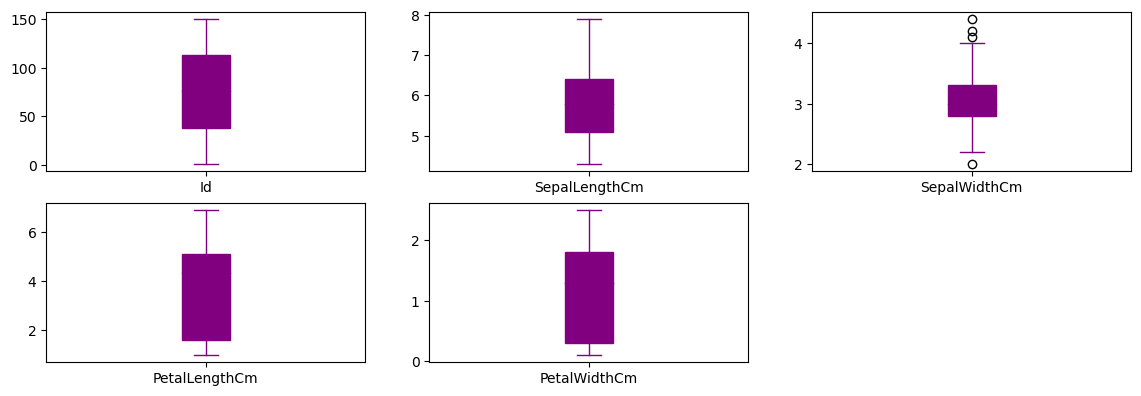

In [26]:
# Boxplots
df.plot(kind="box", subplots=True, layout=(5,3), sharex=False, figsize=(14,12), color = 'purple', patch_artist = True)
plt.show()

### Create a Pair Plot 

##  <span style= 'color: red'>14. What does a pair plot illustrate?   Enter your answer by adding a new code block and use markdown.</span>

C:\Users\deaun\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


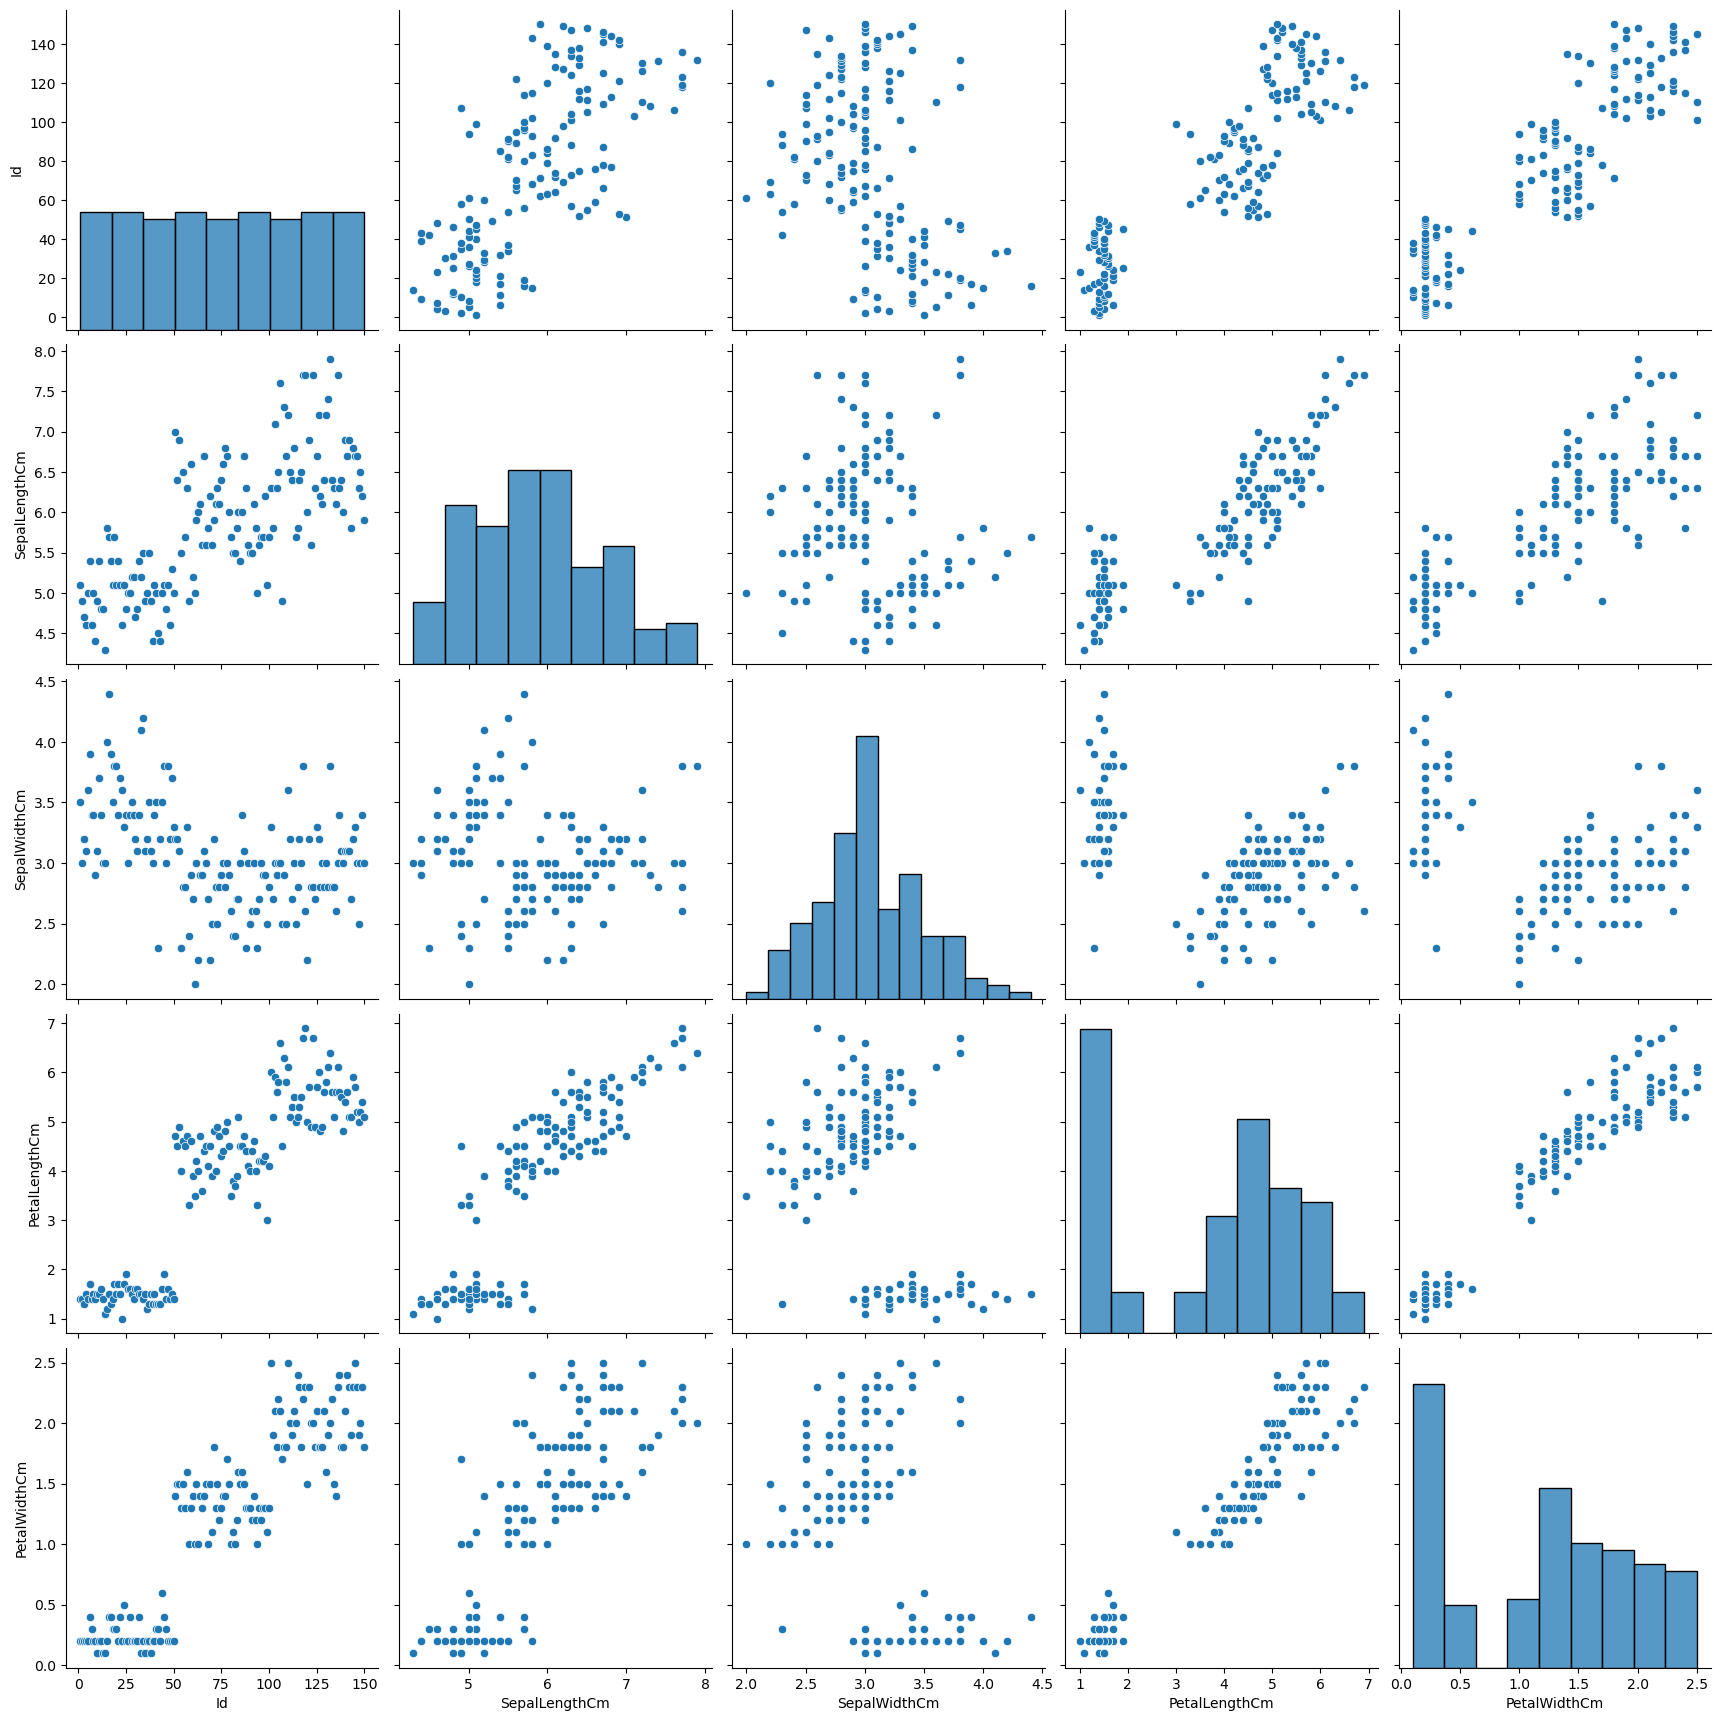

In [27]:
# Please click on the aobe URL to learn more about Pair Plots
sns.pairplot(df, height=3.5);
plt.show()

Pair plot shows the relationship between variable. 

##  <span style= 'color: red'>15. Create a new sns.pairplot using a height of 4.0.  Enter your answer by adding a new code block and use code.</span>

C:\Users\deaun\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


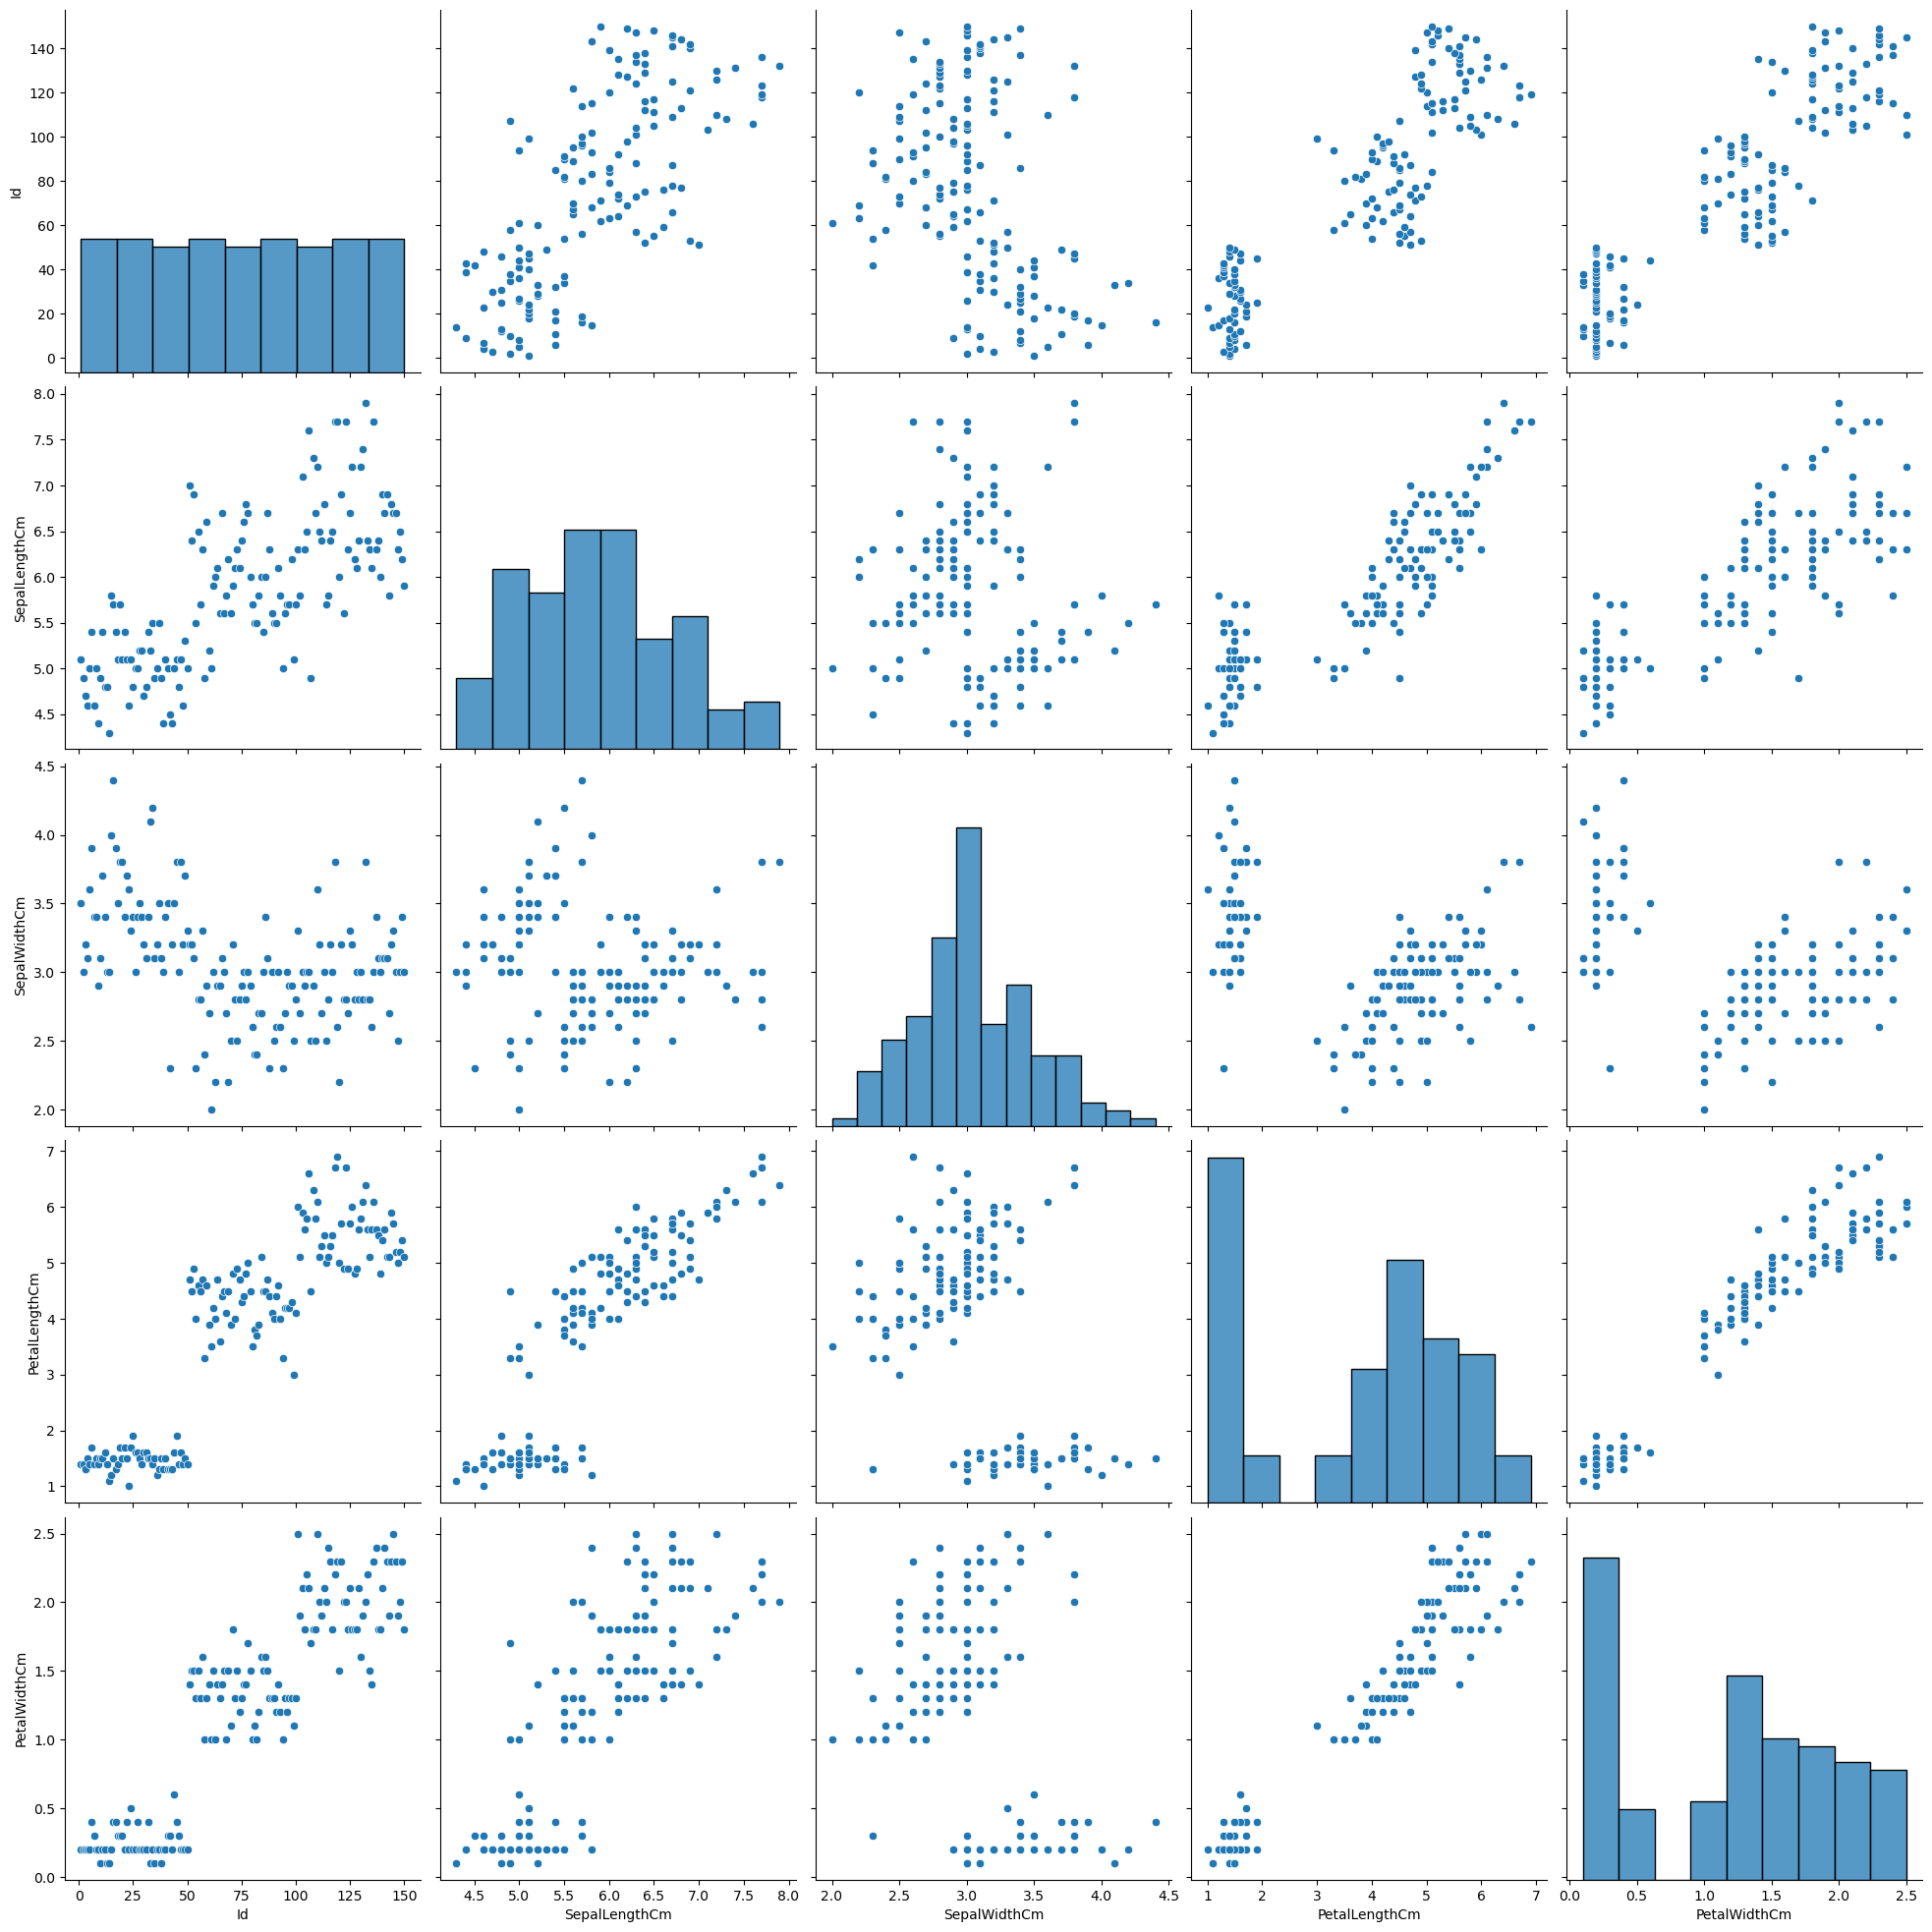

In [31]:
sns.pairplot(df, height=4);
plt.show()

### Creating a Pair Plot with Color

C:\Users\deaun\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


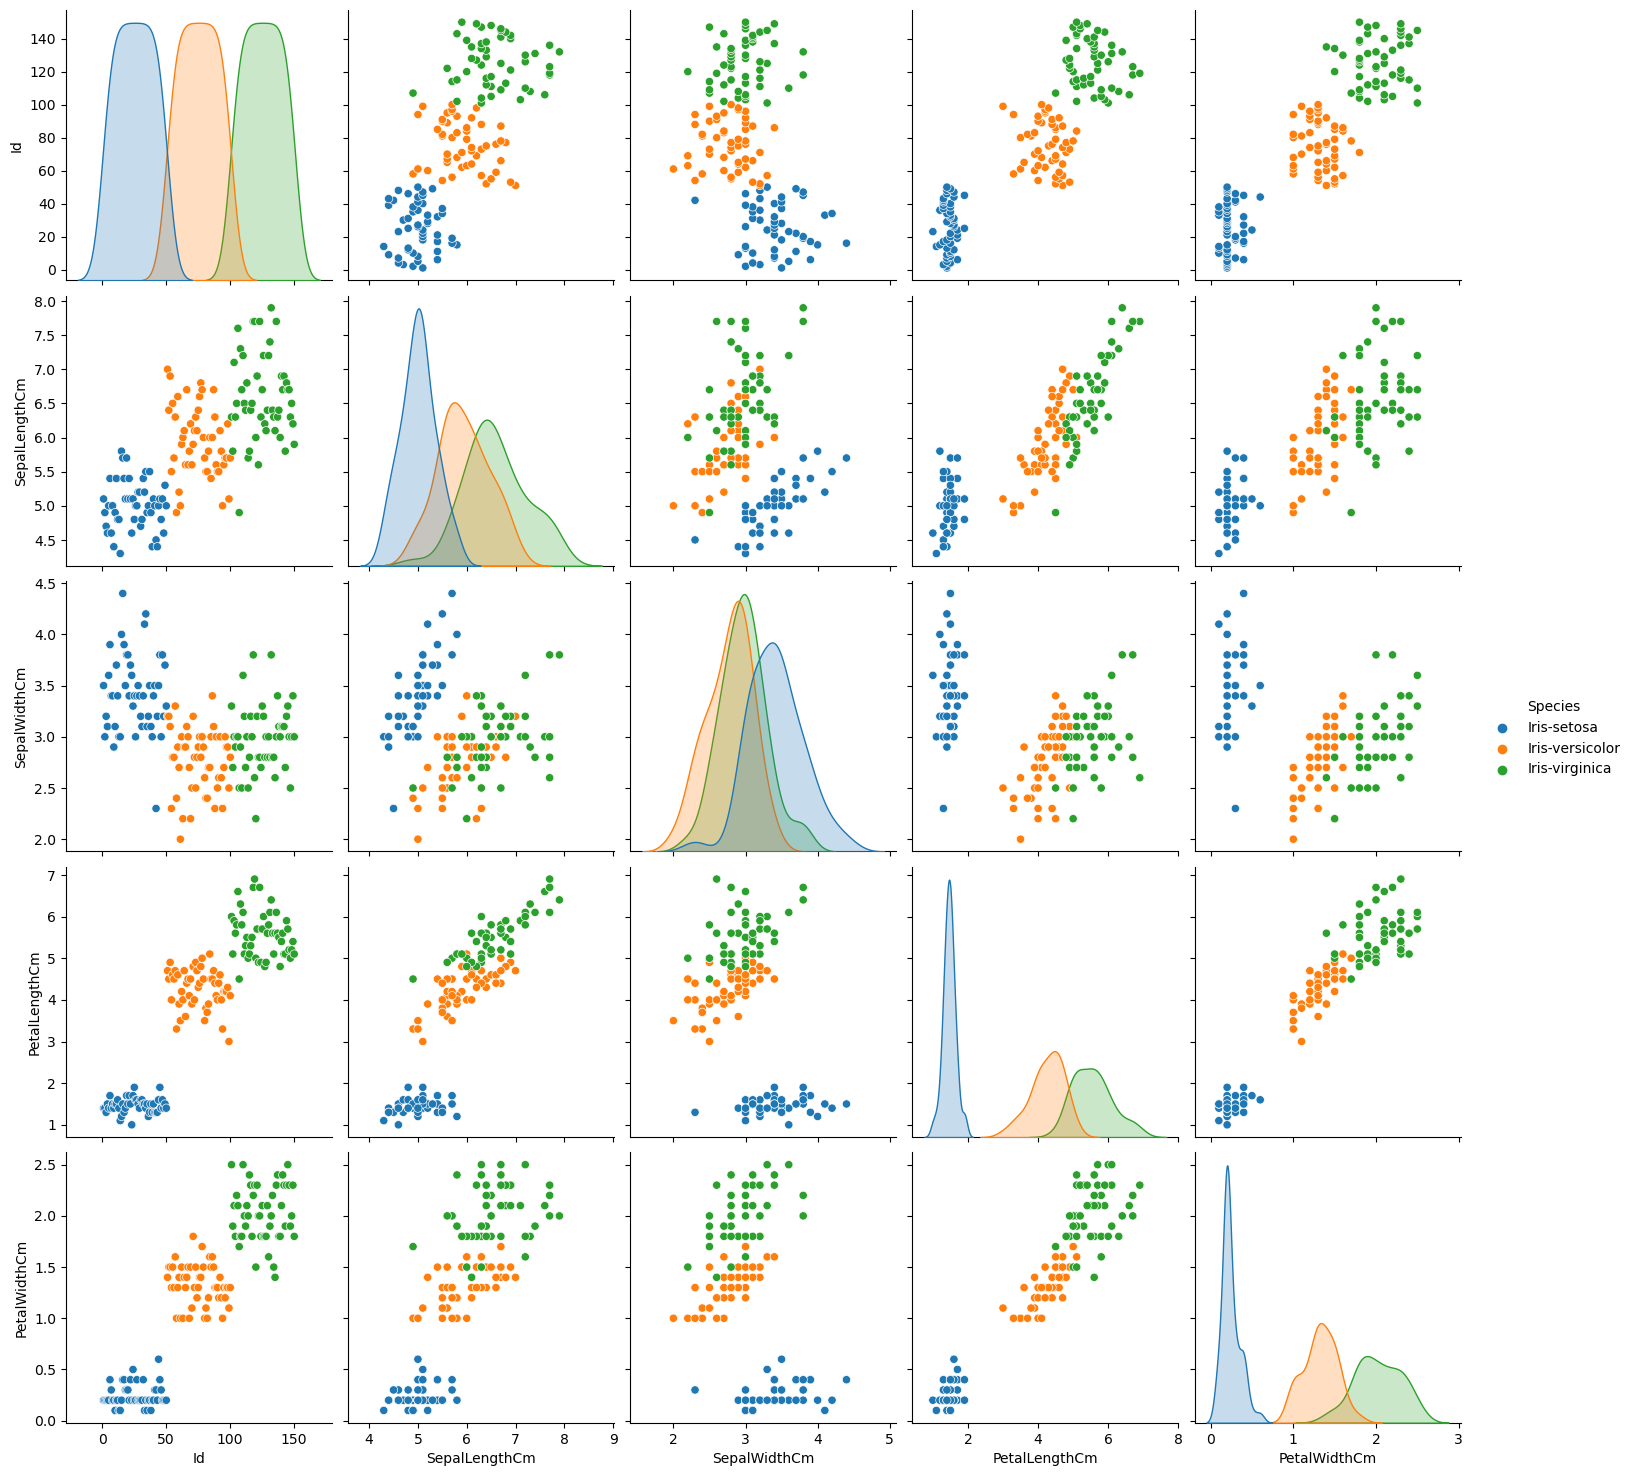

In [32]:
# Let's try that again using color.  Notice: assigning a hue variable adds a semantic mapping and changes the default marginal plot to a layered kernel density estimate (KDE)
sns.pairplot(df, hue='Species', height=3, aspect= 1);


### Creating a Violin Plot  

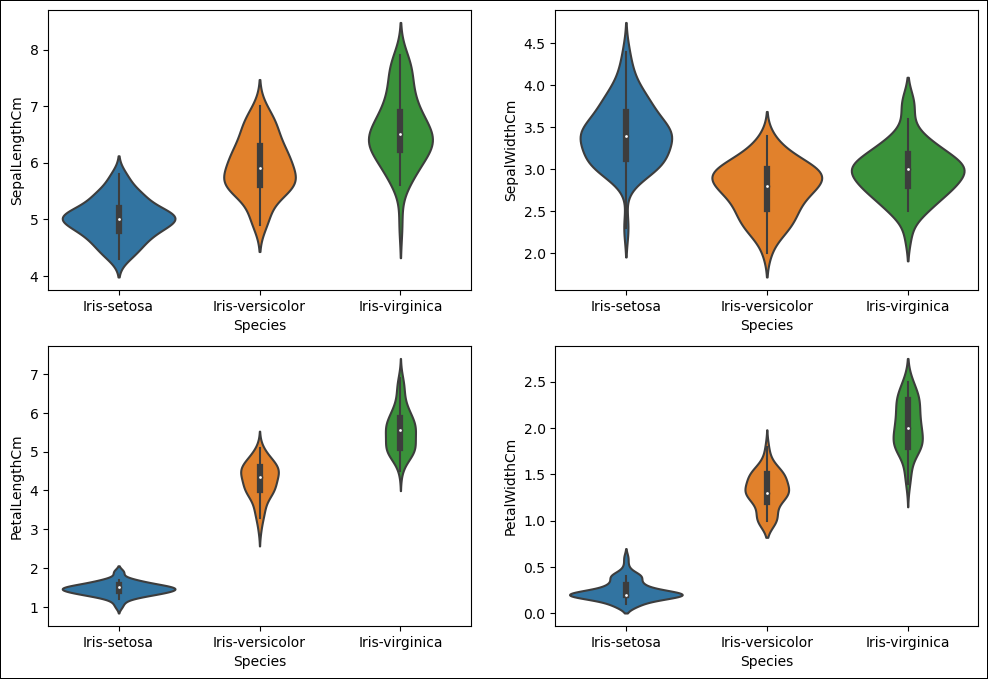

In [33]:
#  Please click on the URL above to learn more about Violin Plots
plt.figure(edgecolor="black", linewidth= 1.2,figsize=(12,8));
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data=df);

##  <span style= 'color: red'>16. Using above code that created a Violin Plot, add a new code block and change the edgecolor to 'red' and the figsize to 15, 10.)  Don't forget to hit run.</span>

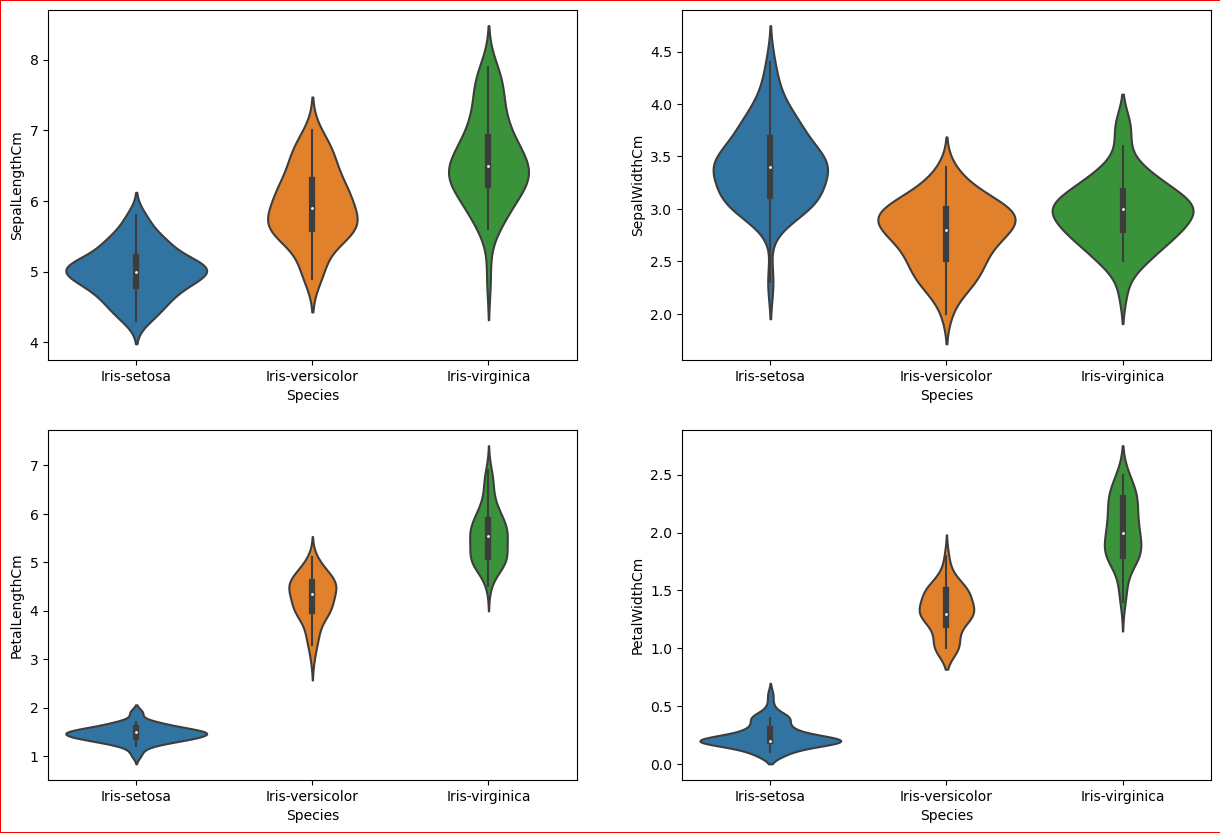

In [34]:
plt.figure(edgecolor="red", linewidth= 1.2,figsize=(15,10));
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data=df);

### Separate the Dataset into Input & Output NumPy Arrays

In [59]:
# store dataframe values into a numpy array
array = df.values
# separate array into input and output by slicing
# for X(input) [:, 1:5] --> all the rows, columns from 1 - 5 
# these are the independent variables or predictors
X = array[:,1:5]
# for Y(input) [:, 5] --> all the rows, column 5
# this is the value we are trying to predict
Y = array[:,5]

##  <span style= 'color: red'>17. What would you set the X = array to if you only wanted to use the first 100 rows? Enter your answer by adding a new code block and copy and paste the above code but change the code to reflect your answer. However, be sure to comment out all lines so only the original code block is used in the analysis.</span>

In [60]:
# store dataframe values into a numpy array
#array = df.values
# separate array into input and output by slicing
# for X(input) [:, 1:5] --> all the rows, columns from 1 - 5 
# these are the independent variables or predictors

#X = array[:100,1:5] #inclues first 100 rows, columns from 1-5 

# for Y(input) [:, 5] --> all the rows, column 5
# this is the value we are trying to predict
#Y = array[:,5]

### Spilt into Input/Output Array into Training/Testing Datasets

In [61]:
# split the dataset --> training sub-dataset: 67%; test sub-dataset: 33%
test_size = 0.33
#selection of records to include in each data sub-dataset must be done randomly
seed = 7
#split the dataset (input and output) into training / test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

##  <span style= 'color: red'>18. What seed are you using in the above code?  Enter your answer by adding a new code block and use markdown.</span>

We are using seven (7) as the seed value.

##  <span style= 'color: red'>19. Why do we enter a seed value?  Enter your answer by adding a new code block and use markdown.</span>

We enter a seed value to show reproducibility - a seed value allow us to use the same value(s) when training and testing each experiment.

##  <span style= 'color: red'>20. How do you know there is a 67/33 split?  Enter your answer by adding a new code block and use markdown.</span>

I know there there is a 67/33 split due to 'test_size' variable having the value of '0.33,' indicating that 33% would be for the testing the dataset, while the remaining 67% would be left for training the dataset.

### Build and Train the Model

##  <span style= 'color: red'>21. What is the model being used below? Enter your answer by adding a new code block and use markdown.</span>

In [62]:
#build the model
model = LogisticRegression(random_state=seed, max_iter=1000)
# train the model using the training sub-dataset
model.fit(X_train, Y_train)
#print the classification report
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print("Classification Report: ", "\n", "\n",report)

Classification Report:  
 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.89      0.89      0.89        18
 Iris-virginica       0.89      0.89      0.89        18

       accuracy                           0.92        50
      macro avg       0.93      0.93      0.93        50
   weighted avg       0.92      0.92      0.92        50



Logistic Regression

### Score the Accuracy of the Model

In [63]:
#score the accuracy leve
result = model.score(X_test, Y_test)
#print out the results
print(("Accuracy: %.3f%%") % (result*100.0))

Accuracy: 92.000%


## Classify/Prediction


   
 <div class="alert alert-block alert-info">
<b> <h3>We have now trained the model. Let’s use the trained model to predict the type of flower we have with the listed values for each variable.
 </h3></b> 
</div>

##  <span style= 'color: red'>22. How would you enter comments to the model.predict to illustrate the variables and values that you used in your prediction? Enter your answer by adding a new code block and use markdown.</span>

#Predict Iris Class based on long petal length - PetalLengthCm > 2.0

In [64]:
model.predict([[5.3, 3.0, 4.5, 1.5]])

array(['Iris-versicolor'], dtype=object)

##  <span style= 'color: red'>23.  (Same as above, but with the second prediction. How would you enter comments to the model.predict to illustrate the variables and values that you used in your prediction? Enter your answer by adding a new code block and use markdown.</span>

#Predict Iris Class base on short petal length - PetalLengthCm < 2.0

In [68]:
model.predict([[5, 3.6, 1.4, 1.5]])

array(['Iris-setosa'], dtype=object)

##  <span style= 'color: red'>24. Make a new prediction by copying and pasting the code above into a new code block.  Include comments to descibe your variable and their values.  (EX. # PetalWidthCm = 7, etc.) Enter your answer by adding a new code block and use code. Don't forget to run the code.</span>

In [70]:
#Predict Iris Class based on short sepal length - SepalWidthCm < 2.0
model.predict([[5, 1.5, 1.4, 1.5]])

array(['Iris-setosa'], dtype=object)

In [76]:
#PetalWidthCm = 6
model.predict([[5, 3.6, 1.4, 6]])

array(['Iris-virginica'], dtype=object)

## Evaluate the Model using the 10-fold Cross-Validation Technique.

In [77]:
# evaluate the algorythm# specify the number of time of repeated splitting, in this case 10 folds
n_splits=10
#fix the random seed
#must use the same seed value so that the same subsets can be obtained 
# for each time the process is repeated
seed=7
# split the whole dataset into folds
# In k-fold cross-validation, the original sample is randomly partitioned into k
#subsamples. Of the k subsamples, a single subsample is retained as the validatio
#testing the model, and the remaining k 1 subsamples are used as training data. T
#process is then repeated k times, with each of the k subsamples used exactly onc
# the validation data. The k results can then be averaged to produce a single est
# advantage of this method over repeated random sub-sampling is that all observat
# both training and validation, and each observation is used for validation exact
kfold=KFold(n_splits, random_state=seed, shuffle=True)
# for logistic regression, we can use the accuracy level to evaluate the model / 
scoring="accuracy"
#train the model and run K-fold cross validation to validate / evaluate the model
results=cross_val_score (model, X, Y, cv=kfold, scoring=scoring)
# print the evaluation results
#result: the average of all the results obtained from the K-fold cross validation
print("Accuracy: %.3f (%.3f)"% (results.mean(), results.std()))

Accuracy: 0.967 (0.054)


##  <span style= 'color: red'>25. What other splits are recommended for n_splits?  Enter your answer by adding a new code block and use markdown.</span>

For k-fold in particular, other than 10-fold splits, 5-fold splits are recommended. It is best to use a small k-fold, to ensure balance between resampling subsets and lessening biases. Other splits in general, it is recommended to use Stratified Shuffle Splits and Time Series Splits; each has their own advantages and disadvantags.

##  <span style= 'color: red'>26. Please leave any comments or questions you may have by adding a new code block and using markdown.</span>